In [5]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime


In [6]:
data_sample = pd.read_csv('DataSample__201709211530.csv')
data_sample2 = pd.read_csv('DataSample__201710061552.csv',dtype={"value": str})
#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)
types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample['owner'].unique() #0 - 6 is monday - sunday 


array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

# Heart Rate

In [9]:
#Heart-Rate - John
    #Heart Rate over time. 
    #In the past 90 days, average heart rate rates
    #Heart rate max/min past 90 days 
    #Is your heart rate lower/higher than the national average? 
    
sleep_df = data_sample[data_sample['type'] == 'health-sleep']  
heartrate_df = data_sample[data_sample['type'] == 'health-heart-rate']  
heartrate_df.index = heartrate_df['startDate']
national_avg_lower = 60
national_avg_upper = 100
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'startDate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_lau

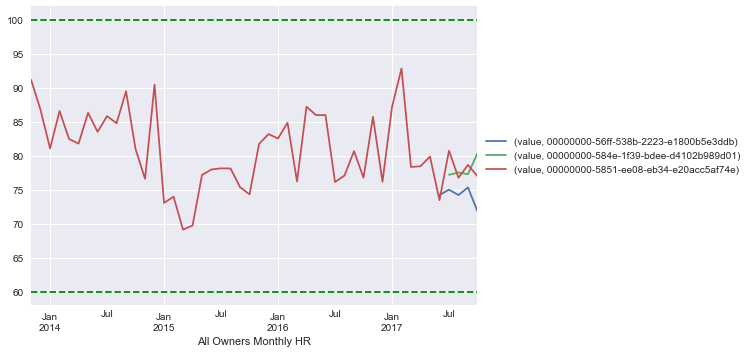

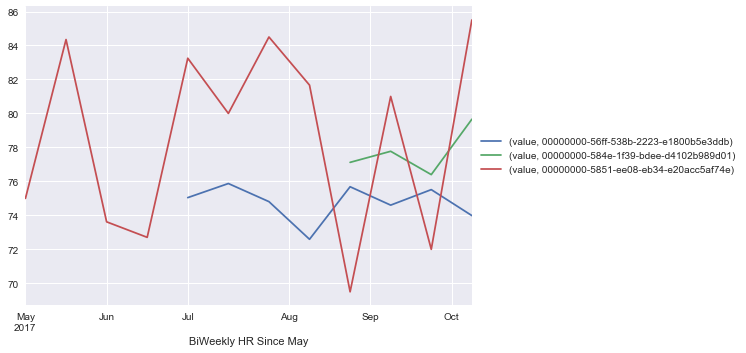

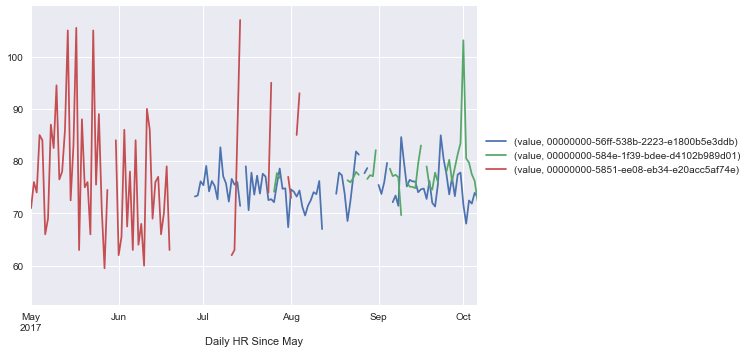

In [10]:
#Heart Rate Over Time for Users

heartrate_df['value'] = pd.Series(heartrate_df['value']).convert_objects(convert_numeric=True)
heartrate_df.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('M').mean().plot()   
plt.axhline(y=national_avg_lower, color='g', linestyle='--')
#plt.text(y=national_avg_lower,s='normal HR lower range',rotation=90,x=0)
plt.axhline(y=national_avg_upper, color='g', linestyle='--')
#plt.text(y=national_avg_upper,s='normal HR upper range',rotation=90,x=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('All Owners Monthly HR')


#Heart Rate Since May 
May = pd.Timestamp('20170501')
heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('2W').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('BiWeekly HR Since May')

heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('D').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Daily HR Since May')

In [8]:
#Looking @ Statistics in the Past 90 Days 
drange = datetime.datetime.today() - pd.Timedelta(days=90)
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days.reset_index()
stats = heart_rate_90days.groupby('owner',as_index=False).agg({
    'value':
    {'HR sum':'sum',
     'HR avg':'mean',
     'HR max':'max',
     'HR min':'min',
     'HR count':'count',
    'HR STD':'std'}})
stats

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


owner      value                           \
                                            HR sum     HR avg HR max HR min   
0  00000000-56ff-538b-2223-e1800b5e3ddb  1247633.0  74.445552  131.0   32.0   
1  00000000-584e-1f39-bdee-d4102b989d01   462063.0  77.749117  138.0   48.0   
2  00000000-5851-ee08-eb34-e20acc5af74e     1486.0  78.210526   95.0   55.0   

                       
  HR count     HR STD  
0    16759  11.211153  
1     5943   8.243853  
2       19  10.643615

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


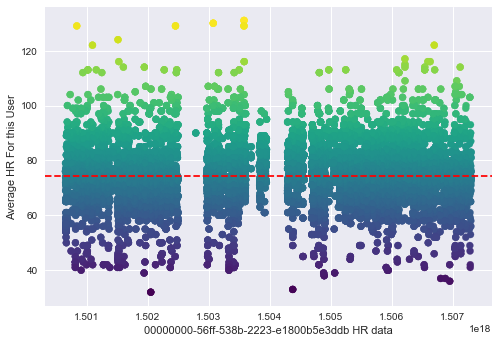

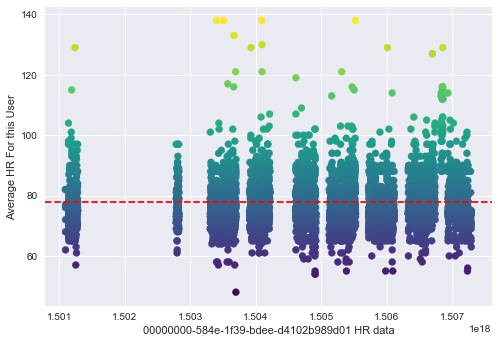

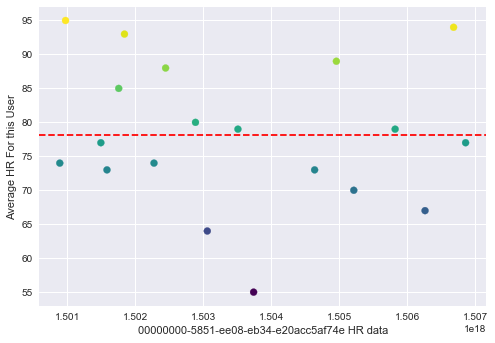

In [23]:
#Individual Plotting & Information  
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days.index = heart_rate_90days['startDate']
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days['ts'] = heart_rate_90days['startDate'].dt.values.astype(np.int64) #// 10 ** 9


def HR_graph(owner): #punch in an owners id, will graph HR avg past 90 days
    muj = heart_rate_90days[heart_rate_90days['owner'] == owner]
    x = plt.scatter('ts', 'value', data=muj,c='value',cmap='viridis')
    if owner in stats['owner'].unique():
        plt.axhline(y=stats[stats['owner'] == owner]['value']['HR avg'].iloc[0],color='r',linestyle='--')
        plt.ylabel('Average HR For this User')
    plt.xlabel(owner + ' HR data')
    plt.show()
    return x


for i in heart_rate_90days['owner'].unique():
    HR_graph(i)

In [78]:
def plot_two_scatters(varx, vary, df1, df2, title1, title2, xlabel, ylabel, **kwargs):
    """function to make 2 side-by-side scatter plots to compare 2 dataframes"""
    fig2, ax2 = plt.subplots(nrows=1, ncols=2)
    fig2.set_size_inches(24, 8)
    plt.subplots_adjust(wspace=0.2)
    
    df1.plot(kind='scatter', x=varx, y=vary, ax=ax2[0], title=title1, **kwargs,c='value',cmap='viridis')
    ax2[0].set_xlabel(xlabel)
    ax2[0].set_ylabel(ylabel)

    df2.plot(kind='scatter', x=varx, y=vary, ax=ax2[1], title=title2, **kwargs,c='value',cmap='viridis')
    ax2[1].set_xlabel(xlabel)
    ax2[1].set_ylabel(ylabel)

    return fig2, ax2

date_indexed = data_sample.copy()
date_indexed.index = date_indexed['startDate']
date_indexed['value'] = pd.Series(date_indexed['value']).convert_objects(convert_numeric=True)
date_indexed = date_indexed.loc[:,['type','value','startDate']].groupby(['type','startDate']).mean().unstack(level=0).resample('D').mean()   
date_indexed.columns = date_indexed.columns.droplevel()

date_indexed

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 'startDate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version


type,health-bmi,health-body-fat,health-heart-rate,health-sleep,health-step-count,health-weight
startDate,,,,,,
2013-11-25,27.188028,0.276388,78.000000,NaN,NaN,88.089204
2013-11-26,26.746608,0.277415,81.000000,NaN,NaN,86.659004
2013-11-27,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-28,26.885394,0.285580,104.666667,NaN,NaN,87.108671
2013-11-29,26.455147,0.268143,99.000000,NaN,NaN,85.714671
2013-11-30,26.376778,0.274755,83.000000,NaN,NaN,85.460754
2013-12-01,26.747303,0.263562,77.000000,NaN,NaN,86.661257
2013-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-03,NaN,NaN,NaN,NaN,NaN,NaN


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'startDate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


type,health-bmi,health-body-fat,health-heart-rate,health-sleep,health-step-count,health-weight
startDate,,,,,,
2017-06-30,NaN,NaN,76.130435,0.0,NaN,NaN
2017-07-01,NaN,NaN,75.386792,NaN,NaN,NaN
2017-07-02,NaN,NaN,79.085714,NaN,NaN,NaN
2017-07-04,NaN,NaN,76.193878,NaN,NaN,NaN
2017-07-05,NaN,NaN,75.225490,0.0,NaN,NaN
2017-07-07,26.816591,0.266642,82.663551,NaN,NaN,71.248964
2017-07-08,27.281044,0.249410,77.104167,NaN,NaN,72.483079
2017-07-09,NaN,NaN,75.731343,NaN,NaN,NaN
2017-07-11,NaN,NaN,76.600000,0.0,NaN,NaN


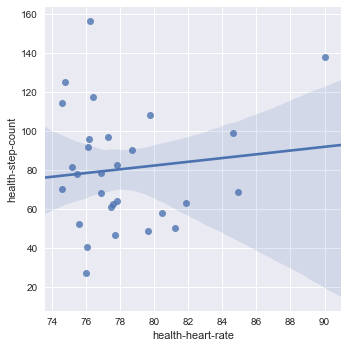

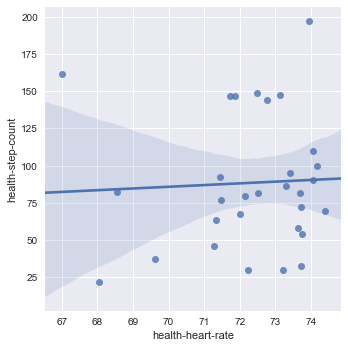

In [133]:
#On Days that HR is > and < AVG HR
HR = data_sample[data_sample['type'] == 'health-heart-rate']
def fifty(owner): #takes in owner, outputs two tables, one for when HR is above average, one for below 
    date_indexed = data_sample.copy()
    date_indexed.index = date_indexed['startDate']
    date_indexed['value'] = pd.Series(date_indexed['value']).convert_objects(convert_numeric=True)
    date_indexed
    date_indexed = date_indexed[date_indexed['owner'] == owner] #these two lines give us the original table, but resampled D for a user
    date_indexed = date_indexed.loc[:,['type','value','startDate']].groupby(['type','startDate']).mean().unstack(level=0).resample('D').mean()   
    date_indexed.columns = date_indexed.columns.droplevel()

    avg = stats[stats['owner'] == owner]['value']['HR avg'].iloc[0]
    above = date_indexed[date_indexed['health-heart-rate'] > avg]
    below = date_indexed[date_indexed['health-heart-rate'] < avg]
    
    sns.lmplot('health-heart-rate','health-step-count',above)
    
    sns.lmplot('health-heart-rate','health-step-count',below)
    
    return[above,below]


#next steps, will look into the specific behavior when below,above average.    
    
fifty('00000000-56ff-538b-2223-e1800b5e3ddb')[0]


In [134]:
def fifty_table(owner):
    date_indexed = data_sample.copy()
    date_indexed.index = date_indexed['startDate']
    date_indexed['value'] = pd.Series(date_indexed['value']).convert_objects(convert_numeric=True)
    date_indexed = date_indexed[date_indexed['owner'] == owner] #these two lines give us the original table, but resampled D for a user
    date_indexed = date_indexed.loc[:,['type','value','startDate']].groupby(['type','startDate']).mean()
    #date_indexed = date_indexed.groupby(pd.Grouper(freq='D', level=-1)).mean()


    
    level_values = date_indexed.index.get_level_values
    result = (date_indexed.groupby([level_values(i) for i in [0,0]]
                      +[pd.Grouper(freq='D', level=-1)]).mean())
    result.index = result.index.droplevel(level=0)
    result.index = result.index.droplevel(level=1)

    return date_indexed



x = fifty_table('00000000-56ff-538b-2223-e1800b5e3ddb')
x.groupby(x.index.get_level_values(0)).agg({
    'value':
    {'HR sum':'sum',
     'HR avg':'mean',
     'HR max':'max',
     'HR min':'min',
     'HR count':'count',
     'HR STD':'std'}})


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'startDate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  
/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


value                                               \
                         HR sum     HR avg        HR max     HR min HR count   
type                                                                           
health-bmi         1.077418e+04  26.668773     29.057550  25.247093      404   
health-body-fat    9.448421e+01   0.251288      0.289421   0.000000      376   
health-heart-rate  6.220890e+05  74.689519    134.000000  32.000000     8329   
health-sleep       0.000000e+00   0.000000      0.000000   0.000000      457   
health-step-count  1.180837e+06  83.416000  20869.000000   1.000000    14156   
health-weight      3.323450e+04  70.862466     77.203003  67.079002      469   

                               
                       HR STD  
type                           
health-bmi           0.510454  
health-body-fat      0.019875  
health-heart-rate   11.440251  
health-sleep         0.000000  
health-step-count  241.014953  
health-weight        1.290214

# Starting Here is just some scratch work.

In [35]:



sleep = data_sample[data_sample['type'] == 'health-sleep']
sleep.index = sleep['startDate']
sleep.index = sleep['startDate']
sleep['duration'] = sleep['value'].apply(lambda x: x.total_seconds()).to_frame()
sleep = sleep.loc[:,'duration'].resample('8H').mean().to_frame()
sleep

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,duration
startDate,
2016-09-21 16:00:00,28811.000000
2016-09-22 00:00:00,NaN
2016-09-22 08:00:00,NaN
2016-09-22 16:00:00,27417.000000
2016-09-23 00:00:00,NaN
2016-09-23 08:00:00,NaN
2016-09-23 16:00:00,NaN
2016-09-24 00:00:00,NaN
2016-09-24 08:00:00,NaN


In [42]:
data_sample['type'].unique()

array(['health-bmi', 'health-weight', 'health-body-fat', 'health-sleep',
       'health-heart-rate', 'health-step-count'], dtype=object)

In [4]:
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample[data_sample['type'] == 'health-sleep'].loc[:,['duration','day_of_week']].groupby('day_of_week').mean().plot()


DataError: No numeric types to aggregate

In [10]:
hourly_sleep = sampler('8H','health-step-count')
hourly_sleep

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,average steps
startDate,
2017-08-01 16:00:00,114.126246
2017-08-02 00:00:00,NaN
2017-08-02 08:00:00,104.181319
2017-08-02 16:00:00,93.159292
2017-08-03 00:00:00,41.000000
2017-08-03 08:00:00,32.192308
2017-08-03 16:00:00,29.130841
2017-08-04 00:00:00,18.500000
2017-08-04 08:00:00,91.805556


In [7]:
#this creates tables of certain types resampled by time, so can look at average steps by month


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1]:

steps_monthly = sampler('M','health-step-count')
steps_weekly = sampler('W','heath-step-count')
sleep_monthly = sampler('M','health-sleep')
sleep_weekly = sampler('W','health-sleep')


NameError: name 'sampler' is not defined

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


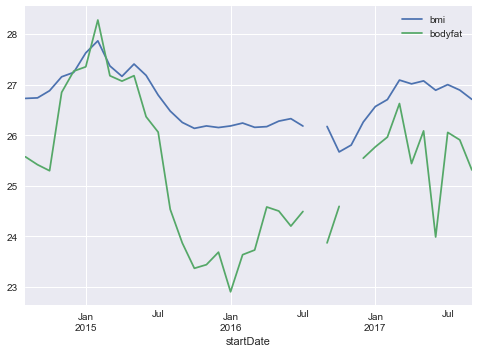

In [50]:

bmi = data_sample[data_sample['type'] == 'health-bmi']
bodyfat = data_sample[data_sample['type'] == 'health-body-fat']
bmi.index = bmi['startDate']
bodyfat.index = bodyfat['startDate']
bmi['value'] = pd.to_numeric(bmi['value'])
bmi = bmi.loc[:,'value']
bmi = bmi.resample('M').mean()
bodyfat['value'] = pd.to_numeric(bodyfat['value']) * 100
bodyfat = bodyfat.loc[:,'value']
bodyfat = bodyfat.resample('M').mean()
bmi = bmi.to_frame('bmi')
bmi['bodyfat'] = bodyfat
bmi.plot()

In [16]:
sleep = data_sample[data_sample['type'] == 'health-sleep']

In [6]:
tester = data_workout.groupby('sessionTitle').agg({"runDistance": [min,max,np.mean]}).dropna()
tester['runDistance']['min']

runDistance                        
                                  min         max        mean
sessionTitle                                                 
Day 11: Strength Training  402.335987  563.270382  497.914432
Day 12: Intervals          241.401592  680.096739  498.410434
Day 17: Drill Day            0.000000    0.000000    0.000000
Day 18: Strength Training    0.000000  321.868790  193.121274
Day 19: Intervals          321.868790  482.803185  395.524673
Day 1: Baseline Run          0.000000  357.074705   50.021569
Day 1: Baseline Workout      0.000000  506.070174   35.153882
Day 22: Long Day             0.000000    0.000000    0.000000
Day 25: Strength Training  402.335987  434.522866  418.429427
Day 26: Intervals          118.269319  402.335987  260.302653
Day 3: Drill Day             0.000000   63.319288   15.430183
Day 7: Fun Day!            369.131848  369.131848  369.131848
Day 8: Long Day             87.664339   87.664339   87.664339
Getting Started              0.000000    0.000000    0.000000
Run                          0.000000   15.918707    2.274101

In [111]:
today = dt.date.today() - dt.timedelta(days=30)
data_workout[data_workout['startDate'] < today].groupby('sessionTitle',as_index=False).sum().loc[:,['sessionTitle','day']]

,sessionTitle,day
0,Day 10: Drill Day,22
1,Day 11: Strength Training,10
2,Day 12: Intervals,13
3,Day 14: Fun Day!,2
4,Day 15: Long Day,15
5,Day 17: Drill Day,20
6,Day 18: Strength Training,11
7,Day 19: Intervals,7
8,Day 1: Baseline Run,62
9,Day 1: Baseline Workout,56


In [112]:
data_workout['day'][4]

1

In [113]:
new1 = data_workout[data_workout['sessionTitle']=='Day 10: Drill Day']
days = new1['day'].unique()
len(days)
data_workout.groupby('sessionTitle').sum()['runDistance'].dropna().sort_values(ascending = False)

sessionTitle
Day 12: Intervals            2492.052168
Day 19: Intervals            1582.098694
Day 11: Strength Training    1493.743295
Day 25: Strength Training     836.858853
Day 1: Baseline Run           800.345109
Day 1: Baseline Workout       632.769878
Day 18: Strength Training     579.363821
Day 26: Intervals             520.605306
Day 7: Fun Day!               369.131848
Day 3: Drill Day               92.581101
Day 8: Long Day                87.664339
Run                            15.918707
Getting Started                 0.000000
Day 22: Long Day                0.000000
Day 17: Drill Day               0.000000
Name: runDistance, dtype: float64

In [114]:
array1 = np.random.randint(1,100,50)
array2 = np.random.randint(1,100,50)
array2.sort()
array1.sort()
array3 = np.append(array1,array2)
array3.sort()
array3

array([ 1,  2,  2,  2,  3,  7,  9, 12, 12, 12, 16, 16, 17, 18, 18, 18, 19,
       20, 21, 22, 23, 23, 26, 27, 28, 28, 29, 30, 32, 34, 34, 35, 35, 37,
       38, 42, 44, 45, 46, 46, 49, 49, 51, 52, 52, 53, 55, 55, 55, 55, 57,
       57, 57, 58, 59, 61, 61, 64, 64, 65, 65, 65, 66, 67, 68, 68, 68, 68,
       71, 72, 72, 72, 74, 75, 75, 76, 76, 77, 78, 78, 78, 79, 82, 83, 83,
       83, 84, 88, 89, 90, 92, 92, 92, 93, 94, 96, 97, 97, 97, 98])

In [115]:
data_workout['runDistance'] = pd.to_numeric(data_workout['runDistance'],errors='coerce')
data_workout2 = data_workout[data_workout['runDistance'] > 0] 
data_workout2['startDate'] = pd.to_datetime(data_workout2['startDate'])
data_workout2.loc[:,['runDistance','startDate']]
#data_workout2.plot(x='startDate',y='runDistance')
#merged = data_workout.merge(data_sample,on='owner',how='outer')
#merged
#Series.to_frame 

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,runDistance,startDate
0,506.070174,2016-12-05 20:02:43
3,29.261812,2016-12-06 01:23:41
5,10.591086,2016-12-06 15:28:29
10,10.157813,2016-12-08 20:14:54
20,63.319288,2016-12-14 20:37:26
27,105.950805,2016-12-19 15:13:14
31,369.131848,2016-12-31 10:52:47
38,87.664339,2017-01-11 12:29:41
40,563.270382,2017-01-13 08:03:36
43,680.096739,2017-01-19 12:13:07


In [116]:
data_workout2['hour'] = data_workout2['startDate'] + datetime.timedelta(days=2)
test = data_workout2.loc[:,['owner','runDistance']]
test['test'] = 1
test = test.groupby('owner',as_index=False).count()
data_workout2.merge(test,on='owner',how='left')
x = data_workout['day'].dt.minutes

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


AttributeError: Can only use .dt accessor with datetimelike values

In [117]:
d = {}
d['a'] = [1,1,2,4]
d['b'] = [1,2,3,4]
d['c'] = [3,5,1,3]
for key in d:
    print(d[key])
x = pd.DataFrame()
x.from_dict(d,orient='columns')

[1, 1, 2, 4]
[1, 2, 3, 4]
[3, 5, 1, 3]


,a,b,c
0,1,1,3
1,1,2,5
2,2,3,1
3,4,4,3


In [118]:
data_sample2 = data_sample.drop(['_id','owner','source','createdAt','updatedAt'],axis=1)
data_sample2['value']

0        26.7386817932
1        71.0419998169
2        26.5866241455
3         0.2586992979
4        70.6380004883
5         0.2496019155
6        70.9650039673
7        26.7097015381
8         0.2548007965
9        26.5576438904
10       70.5610046387
11       26.5200080872
12        0.2507060468
13       70.4610061646
14       70.8470001221
15       26.6652870178
16        0.2415628135
17        0.2506658733
18       70.2089996338
19        26.425157547
20        27.069896698
21        0.2678318024
22       71.9220046997
23        0.2700436413
24       27.0683917999
25        71.918006897
26       26.9505844116
27       71.6050033569
28        0.2578032315
29       27.1643676758
             ...      
18483               26
18484               62
18485               85
18486               23
18487               65
18488               69
18489               61
18490                7
18491               72
18492               74
18493               62
18494               29
18495      

In [119]:
data_workout['startDate'] = pd.to_datetime(data_workout['startDate'])
data_workout['day'] = data_workout['startDate'].dt.dayofweek
#data_workout2.groupby(['sessionTitle','day']).count()
#data_workout2[data_workout2['sessionTitle']=='Run']
tester = data_workout[data_workout['sessionTitle']=='Run']
tester['day'].unique()

array([6, 1, 2, 4, 5, 3, 0])

In [120]:
data_sample.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt
0,1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,A1DB680E-F9C4-4FA4-8818-1D35E398B5F0,Health Mate,health-bmi,2014-08-27 21:41:23,2014-08-27 21:41:23,26.7386817932,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49
1,78219621-1da4-4e3b-87bc-f4885718c63f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,2030515A-1C70-40F3-8470-BDE99ABFC906,Health Mate,health-weight,2014-08-27 21:41:23,2014-08-27 21:41:23,71.0419998169,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58
2,2d917e7e-0844-4f52-b15e-2a5346c96dda,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,96D21A44-67D7-412D-BF3A-543819A8EBF0,Health Mate,health-bmi,2014-08-28 06:24:53,2014-08-28 06:24:53,26.5866241455,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49
3,ab800f4b-bef7-434e-8e57-e0fccc44bfb7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5D73FD9D-17E1-480C-9235-3E5036503E6A,Health Mate,health-body-fat,2014-08-28 06:24:53,2014-08-28 06:24:53,0.2586992979,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53
4,fb2a0865-17c3-4ac0-a782-749cc7befe12,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5A9AB03C-30C9-43B9-9742-02E237A6F36D,Health Mate,health-weight,2014-08-28 06:24:53,2014-08-28 06:24:53,70.6380004883,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58


In [121]:
#sleep variable works differently, has no value
types = ['health-bmi','health-body-fat','health-heart-rate','health-sleep','health-weight']

In [122]:
data_sample2['content'].isnull().sum() == len(data_sample2)

True

In [123]:
data_sample2['originalData'].isnull().sum() == len(data_sample2)

True

In [124]:
data_sample2.iloc[4720]
data_sample2.groupby('type').count()

,sourceId,sourceName,startDate,endDate,value,content,originalData
type,,,,,,,
health-bmi,397,397,397,397,397,0,0
health-body-fat,368,368,368,368,368,0,0
health-heart-rate,7000,7000,7000,7000,7000,0,0
health-sleep,466,466,466,466,466,0,0
health-step-count,9860,9860,9860,9860,9860,0,0
health-weight,422,422,422,422,422,0,0


In [125]:
data_sample2.groupby('type').count()
data_sample2['date'] = pd.to_datetime(data_sample2['startDate'])


In [126]:
x = data_sample2[data_sample2['type'].apply(lambda x: x != 'health-step-count')]
x.value = pd.to_numeric(x.value)

def graph(i):    
    graph = x[x['type'] == i][['date','value']].set_index('date').plot()
    graph.set_ylabel(i)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [101]:
len(data_sample)

18513

In [108]:
len(data_workout.merge(data_sample,on='type',how='outer')) 

18726

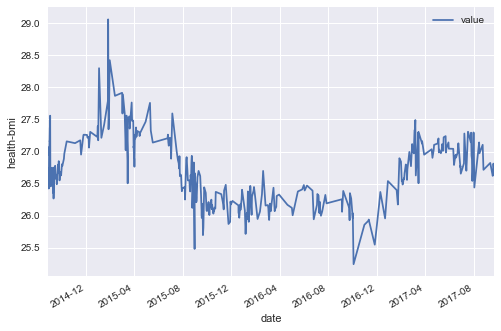

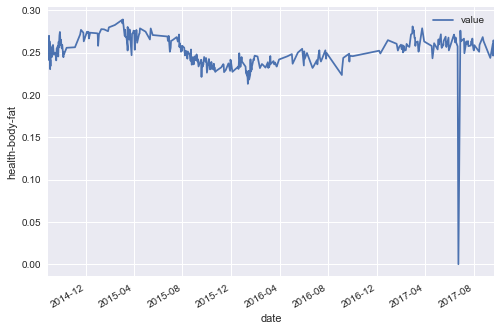

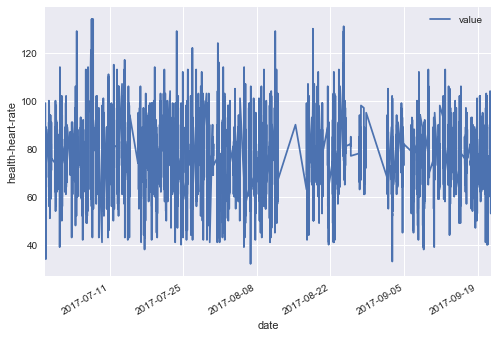

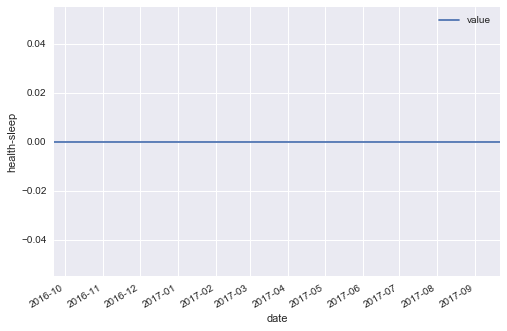

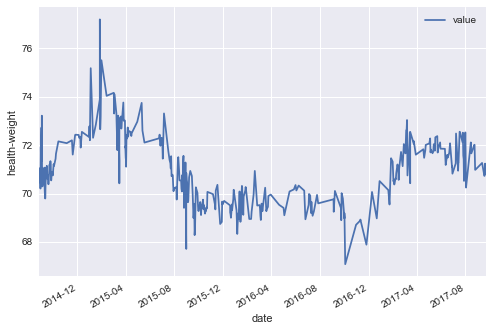

In [10]:
for i in types:
    graph(i)
    



In [ ]:
for i in data_sample2.columns:
    print(i)

In [109]:
data_sample[data_sample2['type'] == 'health-sleep']

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt
858,f9952b6c-2aaa-45a2-a65a-b5663f0fc9a7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,9FA8A1C3-FAF5-4A96-9E8E-1AE07FB14FC5,Clock,health-sleep,2016-09-21 23:00:00,2016-09-22 07:00:11,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
865,c4ffe7da-1ca3-4391-8046-739adb77c904,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,0D4C5E70-BD27-41D7-AC6F-59CC3AE2762D,Clock,health-sleep,2016-09-22 23:23:16,2016-09-23 07:00:13,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
871,f1cada9f-cd44-4477-a1df-e8dc164e164c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,BCBBC4F8-EC07-4814-84CA-B7EC00AB8129,Clock,health-sleep,2016-09-26 02:14:28,2016-09-26 07:00:52,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
872,d17aece4-be2c-45e2-89a2-49c5d612663a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,5B20853B-8C51-4E14-85BA-BAA0F9155C92,Clock,health-sleep,2016-09-26 23:00:00,2016-09-27 07:00:24,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
875,33532560-8801-4710-9056-172823ec1995,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,DBCB7BA1-5A69-449F-908B-955D1F85D837,Clock,health-sleep,2016-09-28 00:44:44,2016-09-28 08:30:26,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
876,671c6486-c1b6-430a-b76f-a879cba50c08,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,778734E6-E948-46ED-B673-7DCFA42F5227,Clock,health-sleep,2016-09-28 23:00:00,2016-09-29 02:58:24,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
877,9101aa37-73a4-40d5-98dd-0707098b7537,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,37413E46-9FCD-4542-838D-E5E32B7B02AA,Clock,health-sleep,2016-09-29 03:31:20,2016-09-29 05:54:00,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
878,c767afd2-33ee-4e4f-9286-fb0d2668b594,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,FA86A47C-445A-428E-9AB1-4A54F90BC71E,Clock,health-sleep,2016-09-29 06:00:24,2016-09-29 06:00:56,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
879,c004a73b-0fce-4e22-9a2b-ace0d3c5041f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,A2868415-FA75-4B0F-B8C6-26022493E221,Clock,health-sleep,2016-09-29 06:53:36,2016-09-29 07:00:25,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
880,ba8e0b9e-64d8-4445-b22a-b0879b59919d,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,7CEDCF58-5F60-46B0-A07E-8BDBE4DDAEE9,Clock,health-sleep,2016-09-29 23:00:00,2016-09-30 06:53:20,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44


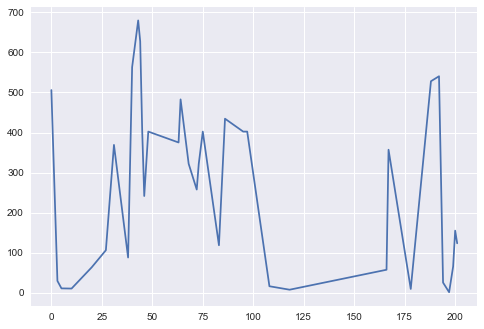

In [38]:
#len(data_workout.index)
plt.plot(data_workout2['runDistance'])

In [45]:
#how do i determine whether or not a facebook is successful? 
#signups through the company, 
data_workout.head()

,_id,type,owner,source,sourceId,sourceName,session,sessionElement,track,sessionTitle,...,startDate,startLocation,stopLocation,runDuration,runDistance,locations,originalData,createdAt,updatedAt,day
0,00000000-5846-38f3-170e-c12476ec38a2,NaN,00000000-56ff-538b-2223-e1800b5e3ddb,NaN,NaN,NaN,00000000-57b4-db56-5353-be0e02a3665d,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,...,2016-12-05 20:02:43,0101000020E61000003BBC314E8DA9424044183F8D7B81...,0101000020E6100000CA319BF8D1A9424096C6B3F4B681...,141.1130590439,506.070174,"[{""lat"": 37.3246248, ""timestamp"": ""2016-12-05T...",NaN,2016-12-05 20:05:07,2016-12-05 20:05:07,0
1,00000000-5846-4835-170e-c12476ec38d8,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57b4-db56-5353-be0e02a3665d,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,...,2016-12-05 21:09:32,0101000020E6100000B3FD8FC34CE342405CB1D3D0659A...,0101000020E6100000B3FD8FC34CE342405CB1D3D0659A...,40.5142489672,0.000000,"[{""lat"": 37.77578014883937, ""timestamp"": ""2016...",NaN,2016-12-05 21:10:13,2016-12-05 21:10:13,0
2,00000000-5846-48eb-170e-c12476ec38da,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57b4-db56-5353-be0e02a3665d,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,...,2016-12-05 21:13:08,0101000020E6100000F72C56744EE342403A7604FB659A...,0101000020E6100000F72C56744EE342403A7604FB659A...,4.717427969,0.000000,"[{""lat"": 37.77583173945339, ""timestamp"": ""2016...",NaN,2016-12-05 21:13:15,2016-12-05 21:13:15,0
3,00000000-5846-83a5-170e-c12476ec3905,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-581c-b2a3-9004-ee14073e1b56,00000000-5846-3d38-170e-c12476ec38b5,NaN,Day 3: Drill Day,...,2016-12-06 01:23:41,0101000020E61000004B16B6714BE34240F8B70B9A649A...,0101000020E61000005A26AC9E46E34240BD8FFEF2649A...,6.1451599598,29.261812,"[{""lat"": 37.77573987379463, ""timestamp"": ""2016...",NaN,2016-12-06 01:23:49,2016-12-06 01:23:49,1
4,00000000-5846-850f-170e-c12476ec3907,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-581c-b2a3-9004-ee14073e1b56,00000000-5846-3d38-170e-c12476ec38b5,NaN,Day 3: Drill Day,...,2016-12-06 01:29:41,0101000020E61000002C2698244DE3424075A8094F669A...,0101000020E61000002C2698244DE3424075A8094F669A...,8.6161289811,0.000000,"[{""lat"": 37.77579171586574, ""timestamp"": ""2016...",NaN,2016-12-06 01:29:51,2016-12-06 01:29:51,1


In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = data_workout[data_workout['type'] != 'health_sleep']
x = x.loc[:,['runDuration','runDistance']]
x['runDuration'] = pd.to_numeric(x['runDuration'],errors='coerce')
x['runDistance'] = pd.to_numeric(x['runDistance'],errors='coerce')
x.dropna()
#pca.fit(x)
data_workout.drop('session',axis=1)

,_id,type,owner,source,sourceId,sourceName,sessionElement,track,sessionTitle,trackTitle,startDate,startLocation,stopLocation,runDuration,runDistance,locations,originalData,createdAt,updatedAt,day
0,00000000-5846-38f3-170e-c12476ec38a2,NaN,00000000-56ff-538b-2223-e1800b5e3ddb,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-05 20:02:43,0101000020E61000003BBC314E8DA9424044183F8D7B81...,0101000020E6100000CA319BF8D1A9424096C6B3F4B681...,141.1130590439,506.070174,"[{""lat"": 37.3246248, ""timestamp"": ""2016-12-05T...",NaN,2016-12-05 20:05:07,2016-12-05 20:05:07,0
1,00000000-5846-4835-170e-c12476ec38d8,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-05 21:09:32,0101000020E6100000B3FD8FC34CE342405CB1D3D0659A...,0101000020E6100000B3FD8FC34CE342405CB1D3D0659A...,40.5142489672,0.000000,"[{""lat"": 37.77578014883937, ""timestamp"": ""2016...",NaN,2016-12-05 21:10:13,2016-12-05 21:10:13,0
2,00000000-5846-48eb-170e-c12476ec38da,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-05 21:13:08,0101000020E6100000F72C56744EE342403A7604FB659A...,0101000020E6100000F72C56744EE342403A7604FB659A...,4.717427969,0.000000,"[{""lat"": 37.77583173945339, ""timestamp"": ""2016...",NaN,2016-12-05 21:13:15,2016-12-05 21:13:15,0
3,00000000-5846-83a5-170e-c12476ec3905,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-5846-3d38-170e-c12476ec38b5,NaN,Day 3: Drill Day,Beginner Running Program,2016-12-06 01:23:41,0101000020E61000004B16B6714BE34240F8B70B9A649A...,0101000020E61000005A26AC9E46E34240BD8FFEF2649A...,6.1451599598,29.261812,"[{""lat"": 37.77573987379463, ""timestamp"": ""2016...",NaN,2016-12-06 01:23:49,2016-12-06 01:23:49,1
4,00000000-5846-850f-170e-c12476ec3907,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-5846-3d38-170e-c12476ec38b5,NaN,Day 3: Drill Day,Beginner Running Program,2016-12-06 01:29:41,0101000020E61000002C2698244DE3424075A8094F669A...,0101000020E61000002C2698244DE3424075A8094F669A...,8.6161289811,0.000000,"[{""lat"": 37.77579171586574, ""timestamp"": ""2016...",NaN,2016-12-06 01:29:51,2016-12-06 01:29:51,1
5,00000000-5847-49a5-170e-c12476ec3916,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-06 15:28:29,0101000020E610000010F9C5E533EF4240021B5EB07E90...,0101000020E61000000B0A52D431EF4240B735BC357D90...,6.0375170112,10.591086,"[{""lat"": 37.86877128764788, ""timestamp"": ""2016...",NaN,2016-12-06 15:28:37,2016-12-06 15:28:37,1
6,00000000-5847-6611-170e-c12476ec3921,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-06 17:29:47,0101000020E61000000000000000000000000000000000...,0101000020E61000000000000000000000000000000000...,5.1670659781,0.000000,{},NaN,2016-12-06 17:29:53,2016-12-06 17:29:53,1
7,00000000-5847-9a3b-170e-c12476ec3923,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-06 21:12:15,0101000020E61000000000000000000000000000000000...,0101000020E61000000000000000000000000000000000...,9.833047986,0.000000,{},NaN,2016-12-06 21:12:27,2016-12-06 21:12:27,1
8,00000000-5848-afe1-435c-2f587b33e396,NaN,00000000-5704-6615-a2ab-44376358dc8e,NaN,NaN,NaN,00000000-57fb-39b1-9287-2c12f5fb8635,NaN,Day 1: Baseline Workout,Beginner Running Program,2016-12-07 16:56:57,0101000020E6100000F8060E084EE3424069765EDC669A...,0101000020E6100000F8060E084EE3424069765EDC669A...,6.5043939948,0.000000,"[{""lat"": 37.7758188313225, ""timestamp"": ""2016-...",NaN,2016-12-07 16:57:05,2016-12-07 16:57:05,2
9,00000000-5848-f522-435c-2f587b33e398,NaN,00000000-5704-6615-a2ab-44376358dc8

In [81]:
types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: int(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)

TypeError: argument of type 'float' is not iterable

In [14]:
data_sample

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration
0,1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,A1DB680E-F9C4-4FA4-8818-1D35E398B5F0,Health Mate,health-bmi,2014-08-27 21:41:23,2014-08-27 21:41:23,26.7387,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,00:00:00
1,78219621-1da4-4e3b-87bc-f4885718c63f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,2030515A-1C70-40F3-8470-BDE99ABFC906,Health Mate,health-weight,2014-08-27 21:41:23,2014-08-27 21:41:23,71.042,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,00:00:00
2,2d917e7e-0844-4f52-b15e-2a5346c96dda,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,96D21A44-67D7-412D-BF3A-543819A8EBF0,Health Mate,health-bmi,2014-08-28 06:24:53,2014-08-28 06:24:53,26.5866,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,00:00:00
3,ab800f4b-bef7-434e-8e57-e0fccc44bfb7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5D73FD9D-17E1-480C-9235-3E5036503E6A,Health Mate,health-body-fat,2014-08-28 06:24:53,2014-08-28 06:24:53,0.258699,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53,00:00:00
4,fb2a0865-17c3-4ac0-a782-749cc7befe12,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5A9AB03C-30C9-43B9-9742-02E237A6F36D,Health Mate,health-weight,2014-08-28 06:24:53,2014-08-28 06:24:53,70.638,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,00:00:00
5,b80745d5-7f44-487f-a387-a1eb98cc42eb,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,E4977A42-C4D6-4AC7-91A3-A11B4C5D4A83,Health Mate,health-body-fat,2014-08-28 23:46:27,2014-08-28 23:46:27,0.249602,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53,00:00:00
6,049c2713-0bf8-44c4-8981-81866380667a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,B278E7C3-4509-4E1B-8C4C-EE469FBFCC15,Health Mate,health-weight,2014-08-28 23:46:27,2014-08-28 23:46:27,70.965,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,00:00:00
7,c229ed70-1325-4976-b1a5-141f885d1d7e,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,544F96A4-915A-4844-8107-D15B369ABE19,Health Mate,health-bmi,2014-08-28 23:46:27,2014-08-28 23:46:27,26.7097,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,00:00:00
8,07b9fcbd-ddcb-44ee-9a80-4c628198cc46,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,D887B5EA-014B-4D49-B315-EF1B22030B9A,Health Mate,health-body-fat,2014-08-29 06:45:05,2014-08-29 06:45:05,0.254801,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53,00:00:00
9,2b245141-0f9d-42e1-a124-7f1abc56fc64,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,A6A406C9-6CAE-4493-8886-3244E19CABB4,Health Mate,health-bmi,2014-08-29 06:45:05,2014-08-29 06:45:05,26.5576,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,00:00:00


In [84]:
sleep = data_sample[data_sample['type'] == 'health-sleep']
sleep.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt
858,f9952b6c-2aaa-45a2-a65a-b5663f0fc9a7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,9FA8A1C3-FAF5-4A96-9E8E-1AE07FB14FC5,Clock,health-sleep,2016-09-21 23:00:00,2016-09-22 07:00:11,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
865,c4ffe7da-1ca3-4391-8046-739adb77c904,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,0D4C5E70-BD27-41D7-AC6F-59CC3AE2762D,Clock,health-sleep,2016-09-22 23:23:16,2016-09-23 07:00:13,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
871,f1cada9f-cd44-4477-a1df-e8dc164e164c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,BCBBC4F8-EC07-4814-84CA-B7EC00AB8129,Clock,health-sleep,2016-09-26 02:14:28,2016-09-26 07:00:52,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
872,d17aece4-be2c-45e2-89a2-49c5d612663a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,5B20853B-8C51-4E14-85BA-BAA0F9155C92,Clock,health-sleep,2016-09-26 23:00:00,2016-09-27 07:00:24,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44
875,33532560-8801-4710-9056-172823ec1995,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,DBCB7BA1-5A69-449F-908B-955D1F85D837,Clock,health-sleep,2016-09-28 00:44:44,2016-09-28 08:30:26,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44


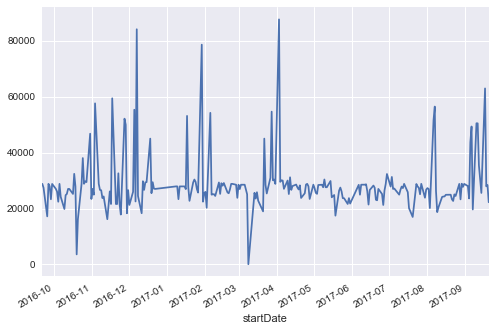

In [75]:
sleep.index = sleep['startDate']
x = sleep.loc[:,'duration'].resample('24H',base=12).sum()
x = x[x> datetime.timedelta(minutes=0)]
#x = x.to_frame()
x = x.apply(lambda x: x.total_seconds())
x.plot()

In [78]:
sleep['duration'] = x
sleep

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration
startDate,,,,,,,,,,,,,,
2016-09-21 23:00:00,f9952b6c-2aaa-45a2-a65a-b5663f0fc9a7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,9FA8A1C3-FAF5-4A96-9E8E-1AE07FB14FC5,Clock,health-sleep,2016-09-21 23:00:00,2016-09-22 07:00:11,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-22 23:23:16,c4ffe7da-1ca3-4391-8046-739adb77c904,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,0D4C5E70-BD27-41D7-AC6F-59CC3AE2762D,Clock,health-sleep,2016-09-22 23:23:16,2016-09-23 07:00:13,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-26 02:14:28,f1cada9f-cd44-4477-a1df-e8dc164e164c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,BCBBC4F8-EC07-4814-84CA-B7EC00AB8129,Clock,health-sleep,2016-09-26 02:14:28,2016-09-26 07:00:52,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-26 23:00:00,d17aece4-be2c-45e2-89a2-49c5d612663a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,5B20853B-8C51-4E14-85BA-BAA0F9155C92,Clock,health-sleep,2016-09-26 23:00:00,2016-09-27 07:00:24,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-28 00:44:44,33532560-8801-4710-9056-172823ec1995,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,DBCB7BA1-5A69-449F-908B-955D1F85D837,Clock,health-sleep,2016-09-28 00:44:44,2016-09-28 08:30:26,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-28 23:00:00,671c6486-c1b6-430a-b76f-a879cba50c08,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,778734E6-E948-46ED-B673-7DCFA42F5227,Clock,health-sleep,2016-09-28 23:00:00,2016-09-29 02:58:24,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-29 03:31:20,9101aa37-73a4-40d5-98dd-0707098b7537,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,37413E46-9FCD-4542-838D-E5E32B7B02AA,Clock,health-sleep,2016-09-29 03:31:20,2016-09-29 05:54:00,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-29 06:00:24,c767afd2-33ee-4e4f-9286-fb0d2668b594,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,FA86A47C-445A-428E-9AB1-4A54F90BC71E,Clock,health-sleep,2016-09-29 06:00:24,2016-09-29 06:00:56,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN
2016-09-29 06:53:36,c004a73b-0fce-4e22-9a2b-ace0d3c5041f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,A2868415-FA75-4B0F-B8C6-26022493E221,Clock,health-sleep,2016-09-29 06:53:36,2016-09-29 07:00:25,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,NaN


In [7]:
def fourpm_split(row):
    start = data_sample.iloc[row]['startDate']
    if start.hour > 15:
        return start.strftime('%Y-%m-%d')
    else:
        return (start - timedelta(1)).strftime('%Y-%m-%d')
    
sleep = sleep.drop_duplicates(subset=['startDate', 'endDate'])
fourpm_groups = sleep.groupby(fourpm_split)


def sleep_agg(grouped):
    result_df = pd.DataFrame(columns=sleep.columns)
    for name, group in grouped:
        # this assumes that there are no duplicates; if not, they can be removed here:
        # group = group.drop_duplicates(subset=['startDate', 'endDate'])
        
        # this also assumes that the startDates are never decreasing, but if this is
        # not true, the group can be sorted by startDate here:
        # group = sorted(group, key=lambda row: row['startDate'])
        
        entry = {}
        
        # finding startDate, endDate, and duration
        startDate, endDate, duration = group.iloc[0][['startDate', 'endDate', 'duration']]
        for i in range(1, len(group)):
            # prints a warning if the sleep data crosses the daily separator of 4pm
            if group.iloc[i]['endDate'].hour > 15:
                print('Warning: an entry on ', str(name), ' crosses 4pm')
            if endDate > group.iloc[i]['endDate']:
                continue
            elif group.iloc[i]['startDate'] < endDate:
                endDate = group.iloc[i]['endDate']
                duration += group.iloc[i]['duration'] - (endDate - group.iloc[1]['startDate'])
            else:
                endDate = group.iloc[i]['endDate']
                duration += group.iloc[i]['duration']
        entry.update({
            'startDate': startDate,
            'endDate': endDate,
            'duration': duration
        })
        
        # if we want to keep all the other stuff, take them from the first row in the group
        cols = ['_id', 'owner', 'source', 'sourceId', 'sourceName', 'type',
                'value', 'content', 'originalData', 'createdAt', 'updatedAt']
        entry.update({col: group.iloc[0][col] for col in cols})
        
        # adds the new row
        result_df = result_df.append(pd.Series(entry, name=name))
    return result_df
x = sleep_agg(fourpm_groups)
x

NameError: name 'timedelta' is not defined